## 5.3 Ajuste não linear e linearização 

Muitas vezes, temos dados experimentais em que o ajuste como combinação linear nos parâmetros não é adequado e não pode ser considerado. Neste caso, necessitamos de outras famílias de funções para representar adequadamente uma função representada em uma tabela.


## Ajuste hiperbólico

Considere os dados obtidos experimentalmente, conforme ilustrado na figura abaixo

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/6_APROXIMACAO_DE_FUNCOES/imagens/ajuste_hiperbolico.png" width="480">

Observando a o diagrama de dispersão, vemos que a representação dos dados possui um comportamento do tipo:

$$ g(x) = \frac{1}{a_1x+a_2}$$

Para encontrar os parâmetros $a_1$ e $a_2$ da forma como fizemos anteriormente, podemos linearizar a função fazendo

$$ h(x) = \frac{1}{g(x)} = a_1x+a_2 $$

que aproxima a função

$$ \frac{1}{f(x)}$$

e temos agora o caso do ajuste linear, já desenvolvido anteriormente.

Assim, a partir da tabela original, construímos uma nova tabela

\begin{array}{cccc} 
\hline
x_1      &x_2       &... &x_m  \\ \hline
1/f(x_1) &1/f(x_2)  &... &1/f(x_m)  \\ \hline
\end{array} 

   
O problema agora consiste em aproximarmos a função $\frac{1}{f(x)}$ por uma reta $h(x)=a_1x+a_2$, e o sistema de equações normais é dado por 


$$ \begin{cases} 
\left(\sum_{i=1}^{m}x_i^2\right)a_ 1 +\left(\sum_{i=1}^{m} x_i\right) = \sum_{i=1}^{m} \frac{x_i}{f(x_i)}\\ 
\left(\sum_{i=1}^{m}x_i\right)a_ 1 +\left(m \right)a_2 = \sum_{i=1}^{m} \frac{1}{f(x_i)}\\
             \end{cases} $$


### Exemplo 1
Considere a função f (x) tabelada nos pontos, como segue

\begin{array}{cccc} 
\hline
x_1      &-3.0   &-2.0   &-1.0   &-0.5   &-0.4 \\ \hline
f(x_1) &-0.13  &-0.20  &-0.49  &-2.01  &-4.99\\ \hline
\end{array} 

** Solução **
Plotando os pontos tem-se

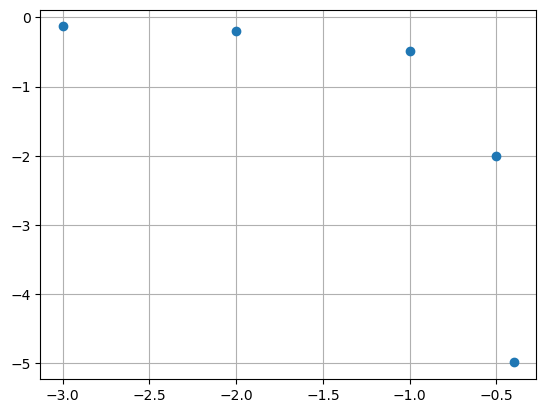

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([ -3.0, -2.0, -1.0, -0.5, -0.4])
Y = np.array([ -0.13, -0.20, -0.49, -2.01, -4.99])
# plotando
plt.plot(X, Y, "o")
plt.grid()
plt.show()

O que sugere um comportamento de uma função do tipo $$g(x) = \frac{1}{a_1x+a_2}$$. 
Para confirmar, e verificar se a linearização do tipo $$h(x) = \frac{1}{g(x)} = a_1x+a_2$$ irá funcionar, construímos uma nova tabela e plotamos os pontos

[-7.69230769 -5.         -2.04081633 -0.49751244 -0.2004008 ]


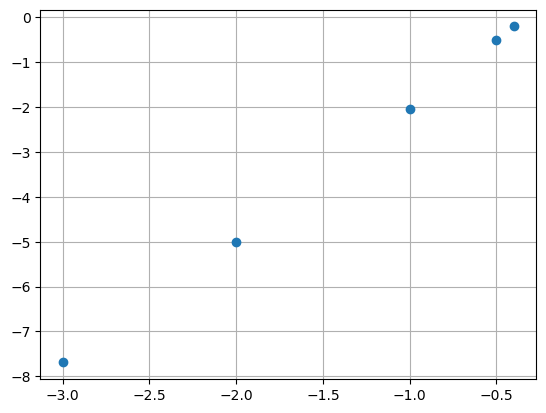

In [3]:
Yl = np.power(Y, -1) 
print(Yl)
# plotando
plt.plot(X, Yl, "o")
plt.grid()
plt.show()

Notamos que os pontos parecem alinhados agora, o que sugere que podemos obter $a_1$ e $a_2$ ajustando uma reta a essa nova tabela

Parâmetros a1= 2.8952177836767707  e a2 = 0.9091930898234526


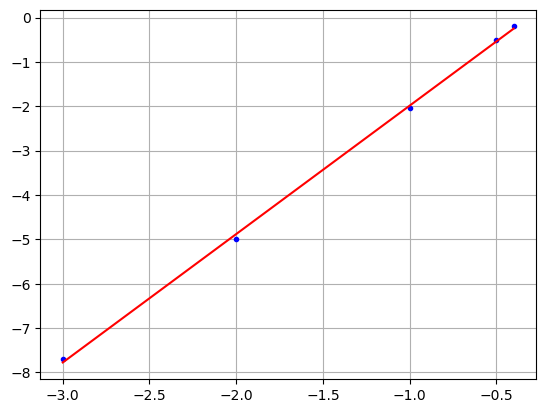

In [10]:
# montando a matriz do sistema
# ajuste por a1*x + a2*1, ou seja, g1(x) = x, g2(x) = 1
g1 = lambda x: x
g2 = lambda x: np.ones(len(x))
V = np.array([g1(X), g2(X)]).T

A = np.dot(V.T,V)
B = np.dot(V.T,Yl)

# resolvendo
a = np.linalg.solve(A, B)
print ("Parâmetros a1=", a[0]," e a2 =", a[1])

# lista de pontos para os plots
Xr = np.linspace(X[0], X[-1], 50)

#reta
h = lambda X: a[0]*X + a[1]
# plotando
plt.plot(X, Yl, "b.", Xr, h(Xr), "r-") 
plt.grid()
plt.show()


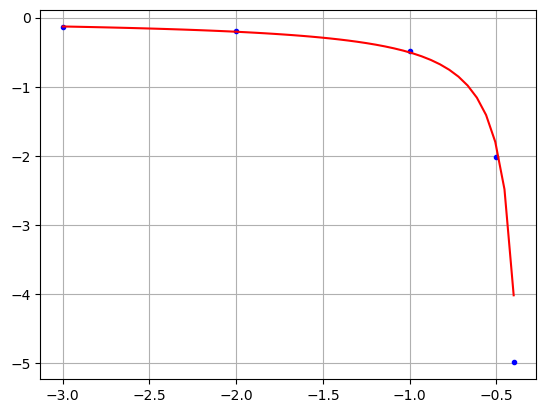

In [11]:

# hipérbole
g = lambda X: np.power(a[0]*X+a[1], -1)
Yr = g(Xr)
# plotando
plt.plot(X, Y, "b.", Xr, g(Xr), "r-") 
plt.grid()
plt.show()

## Ajuste exponencial

Podemos obter dados experimentais dispostos conforme ilustrado na figura abaixo, a qual sugere que devemos aproximar a função observada por uma função $g(x)$ da forma $g(x) = a(b)^x$ com os parâmetros $a$ e $b$ positivos.
<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/6_APROXIMACAO_DE_FUNCOES/imagens/ajuste_exp.png" width="480">

O método dos mínimos quadrados desenvolvido anteriormente pode ser usado
fazendo-se a seguinte transformação

$$ h(x) = ln(g(x)) = ln(a(b)^x) = ln(a) + xln(b)$$

Então, fazendo 

$$ a_1 = ln(a) \to e^{a_1}=a$$

$$ a_2 = ln(b) \to e^{a_2}=b$$

temos a linearização 

$$h(x) = a_1 + a_2x$$

Então, construímos ma nova tabela 

\begin{array}{cccc} 
\hline
x_1        &x_2         &... &x_m  \\ \hline
ln(f(x_1)) &ln(f(x_2))  &... &ln(f(x_m))  \\ \hline
\end{array} 

e buscamos os parâmetros $a_1$ e $a_2$ que ajustam uma reta a esses dados, ou seja, buscamos a solução do sistema

$$ \begin{cases} 
\left(\sum_{i=1}^{m}x_i^2\right)a_ 1 +\left(\sum_{i=1}^{m} x_i\right)a_2 =  \sum_{i=1}^{m} ln(f(x_i))x_i \\ 
\left(\sum_{i=1}^{m}x_i\right)a_ 1 +\left(m \right)a_2 = \sum_{i=1}^{m} ln(f(x_i))\\
             \end{cases} $$

### Exercício resolvido

**Exemplo 3:** Considere uma função tabelada nos pontos, como segue:

$$
\begin{array}{c|c|c|c|c|c|c}
x_i & -1 & -0.9 & -0.8 & 0 & 1 & 2 \\
\hline f\left(x_i\right) & 6.01 & 5.39 & 4.80 & 2.01 & 0.65 & 0.21
\end{array}
$$

Determine uma função $g(x)$ que melhor se ajuste aos dados da tabela de $f(x)$.

[-1.11689997  0.68139335]


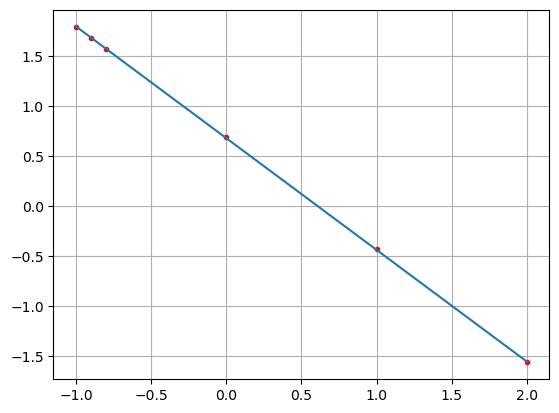

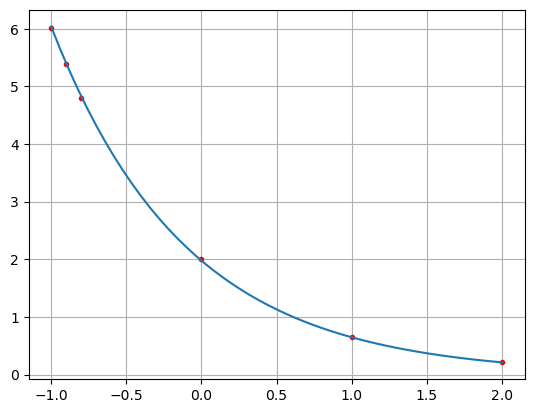

In [29]:
import math
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

X = np.array([ -1, -0.9, -0.8, 0, 1, 2])
Y = np.array([ 6.01, 5.39, 4.8, 2.01, 0.65, 0.21])
Yl = np.log(Y) 

# montando a matriz do sistema
A = np.array([[np.sum(X*X), np.sum(X)],
              [np.sum(X),   len(X)]])
B = np.array([np.sum(X*Yl), np.sum(Yl)])

a = solve(A, B)
print (a)

# lista de pontos para os plots
Xr = np.linspace(X[0], X[-1], 51)
#reta
h = lambda X: a[0]*X + a[1]
# plotando
plt.plot(X, Yl, "r.", Xr, h(Xr), "-") 
plt.grid()
plt.show()
  
# hipérbole
k = math.exp(a[1])
b = math.exp(a[0])
g = lambda X: k*np.power(b,X)

Yr = g(Xr)
# plotando
plt.plot(X, Y, "r.", Xr, g(Xr), "-") 
plt.grid()
plt.show()

**2:** Linearize o modelo matemático
$$ y = \alpha x e^{\beta x}$$ 
e encontre os parâmetros $\alpha$ e $\beta$ que fornecem o melhor ajute com base nos seguintes dados.  
$$
\begin{array}{cccccccccc}
\hline
x    &0,1 &0,2 &0,4 &0,6  &0,9 &1,1 &1,5 &1,7 &1,8\\
\hline
y    &0,75 &1,25 &1,45 &1,25 &0,85 &0,55 &0,35 &0,19 &0,18\\
\hline
\end{array}
$$

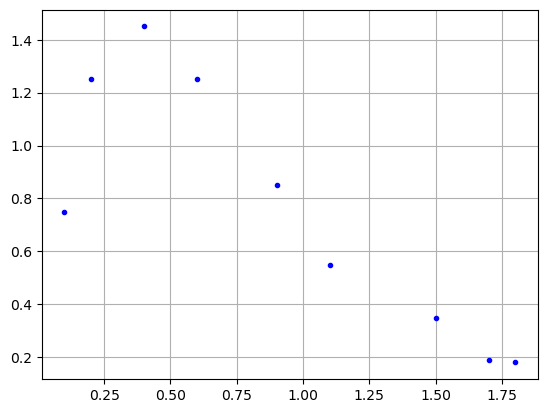

In [75]:
x = np.array([0.1, 0.2, 0.4, 0.6, 0.9, 1.1, 1.5, 1.7, 1.8])
y = np.array([0.75, 1.25, 1.45, 1.25, 0.85, 0.55, 0.35, 0.19, 0.18])
# plotando
plt.plot(x,y, "b.")
plt.grid()
plt.show()

fazendo 
$$ln(y)=ln(\alpha x e^{\beta x})$$
$$ln(y)=ln(\alpha)+ln(x)+ \beta x$$
$$ln(y)-ln(x) = \beta x + ln(\alpha)$$

escrevendo 
$$y' = a_1x+a_2$$

sendo 
$$y'=ln(y)-ln(x)$$ 

$$a_1 = \beta$$  

$$a_2 = ln(\alpha)$$

obtemos os pontos alinhados

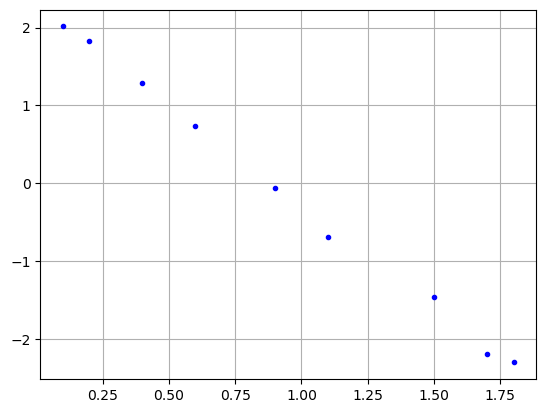

In [76]:
yl = np.log(y)-np.log(x)
plt.plot(x,yl, "b.")
plt.grid()
plt.show()

In [77]:
A = np.array([[np.sum(x * x), np.sum(x)],
              [np.sum(x),     len(x)]])

B = np.array([np.sum(x*yl),
              np.sum(yl)])

a = solve(A, B)

alpha = np.exp(a[1])
beta = a[0]
print(alpha, beta)

9.910716948702433 -2.5870818862156093


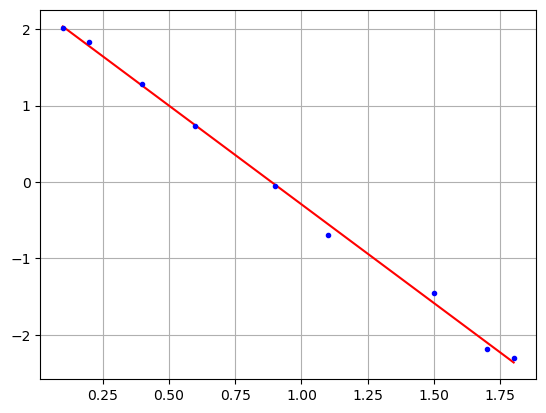

In [78]:
h = lambda x: a[0]*x + a[1]

xr = np.linspace(x[0], x[-1], 20)
plt.plot(xr,h(xr), "r-", x,yl, "b.")
plt.grid()
plt.show()

In [79]:
alpha = np.exp(a[1])
beta = a[0]
print(alpha, beta)

9.910716948702433 -2.5870818862156093


In [80]:
g = lambda x: alpha*x*np.exp(beta*x) 

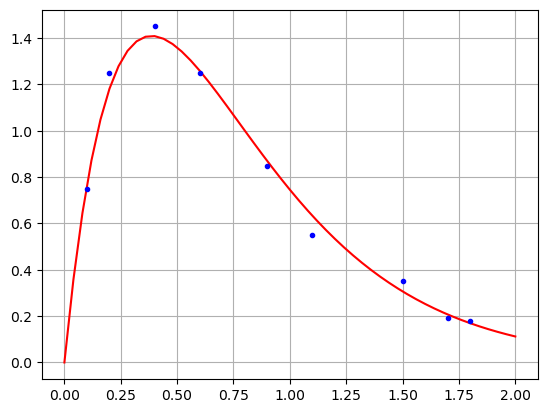

In [81]:
xr = np.linspace(0,2, 51)
plt.plot(xr,g(xr), "r-", x,y, "b.")
plt.grid()
plt.show()

Resposta: $\alpha = 9.6618$ e $\beta = -2.4733$

Exemplos de linearização de algumas funções:



<img src="imagens/linearizacao.png" width="800">


**Exercícios:**

**1.** Considere os dados de um experimento conforme tabela:
$$
\begin{array}{c|c|c|c|c|c|c|c}
x_i & -9 & -6 & -4 & -2 & 0 & 2 & 4 \\
\hline f\left(x_i\right) & 30.1 & 10.1 & 8.9 & 5.9 & 5.0 & 3.9 & 4.01
\end{array}
$$

Usando o método dos mínimos quadrados e o Software Numérico, ajustar aos dados da tabela funções: 

a) Hiperbólica.

b) Exponencial.

c) Compare os resultados obtidos.



Parâmetros a1= 0.017848918892280533  e a2 = 0.19822916667652965


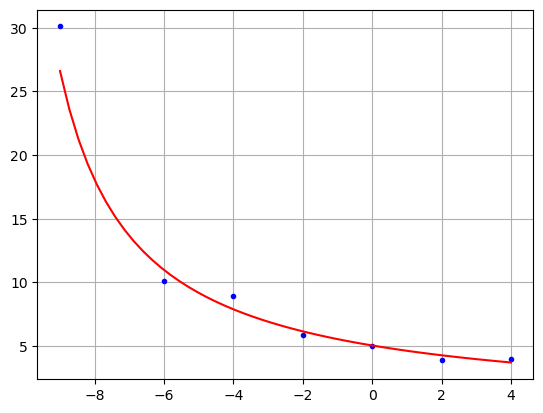

In [69]:
# ajuste hiperbólico
X = np.array([-9, -6, -4, -2, 0, 2, 4])
Y = np.array([30.1, 10.1, 8.9, 5.9, 5.0, 3.9, 4.01])

Yl = np.power(Y, -1) 
# montando a matriz do sistema
# ajuste por a1*x + a2*1, ou seja, g1(x) = x, g2(x) = 1
g1 = lambda x: x
g2 = lambda x: np.ones(len(x))

V = np.array([g1(X), g2(X)]).T
A = np.dot(V.T,V)
B = np.dot(V.T,Yl)
a = np.linalg.solve(A,B)
print ("Parâmetros a1=", a[0]," e a2 =", a[1])

# lista de pontos para os plots
Xr = np.linspace(X[0], X[-1], 50)

# hipérbole
g = lambda X: np.power(a[0]*X+a[1], -1)
Yr = g(Xr)
# plotando
plt.plot(X, Y, "b.", Xr, g(Xr), "r-") 
plt.grid()
plt.show()


Parâmetros a1= -0.14779344030967015  e a2 = 1.688624046499277


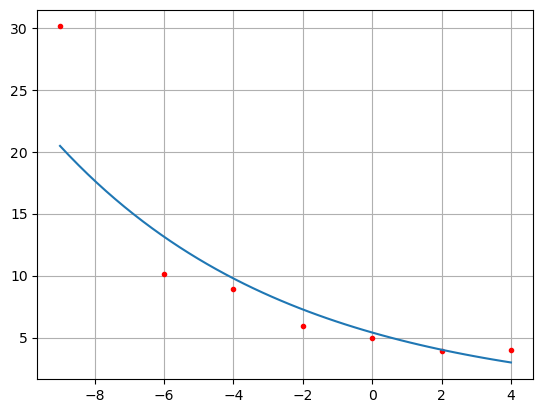

In [63]:
# ajuste exponencial
X = np.array([-9, -6, -4, -2, 0, 2, 4])
Y = np.array([30.1, 10.1, 8.9, 5.9, 5.0, 3.9, 4.01])

Yl = np.log(Y) 
# montando a matriz do sistema
# ajuste por a1*x + a2*1, ou seja, g1(x) = x, g2(x) = 1
g1 = lambda x: x
g2 = lambda x: np.ones(len(x))

V = np.array([g1(X), g2(X)]).T
A = np.dot(V.T,V)
B = np.dot(V.T,Yl)
a = np.linalg.solve(A,B)
print ("Parâmetros a1=", a[0]," e a2 =", a[1])

# lista de pontos para os plots
Xr = np.linspace(X[0], X[-1], 50)

# exponencial
k = math.exp(a[1])
b = math.exp(a[0])
g = lambda X: k*np.power(b,X)

Yr = g(Xr)
# plotando
plt.plot(X, Y, "r.", Xr, g(Xr), "-") 
plt.grid()
plt.show()


# a hipérbole aproxima melhor a função

**2.** Ajuste os dados abaixo (número de bactérias por unidade de volume) à curva $y=ab^x$. Plote o gráfico da função obtida juntamente com os dados tabelados.
$$
\begin{array}{cccccccc}
\hline
nº de horas &0 &1 &2 &3 &4 &5 &6 \\ 
\hline
nº de bactéricas &32 &47 &65 &92 &132 &190 &275  \\ 
\hline 
\end{array}
$$	

Parâmetros a1= 0.35554547064971853  e a2 = 3.4703145086034


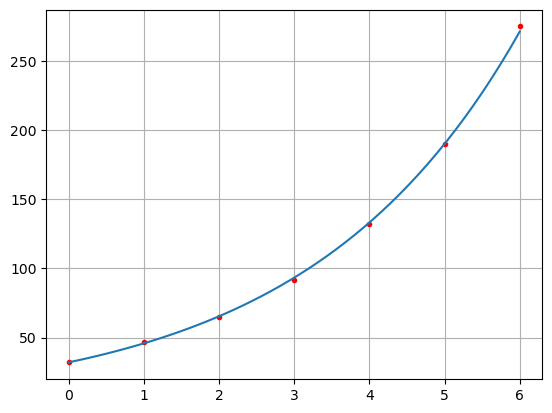

In [64]:
# ajuste exponencial
X = np.array([0, 1, 2, 3, 4, 5, 6]).astype(float)
Y = np.array([32, 47, 65, 92, 132, 190, 275]).astype(float)

Yl = np.log(Y) 
# montando a matriz do sistema
# ajuste por a1*x + a2*1, ou seja, g1(x) = x, g2(x) = 1
g1 = lambda x: x
g2 = lambda x: np.ones(len(x))

V = np.array([g1(X), g2(X)]).T
A = np.dot(V.T,V)
B = np.dot(V.T,Yl)
a = np.linalg.solve(A,B)
print ("Parâmetros a1=", a[0]," e a2 =", a[1])

# lista de pontos para os plots
Xr = np.linspace(X[0], X[-1], 50)

# exponencial
k = math.exp(a[1])
b = math.exp(a[0])
g = lambda X: k*np.power(b,X)

Yr = g(Xr)
# plotando
plt.plot(X, Y, "r.", Xr, g(Xr), "-") 
plt.grid()
plt.show()

**3.** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/522)) Os dados tabulados a seguir foram gerados a partir de uma experiência que continha inicialmente cianeto de amônio puro ($NH_4OCN$). Sabe-se que tais mudanças de concen- tração podem ser modeladas pela seguinte equação:

$$
c=\frac{c_0}{1+k c_0 t}
$$

em que $c_0$ e $k$ são parâmetros. Use uma transformação para linearizar essa equação. A seguir, use regressão linear para prever a concentração em $t = 160$ min.

$$
\begin{array}{l|ccccc}
\mathrm{t}(\mathrm{~min}) & 0 & 20 & 50 & 65 & 150 \\
\hline \mathrm{c}(\mathrm{mols} / \mathrm{L}) & 0,381 & 0,264 & 0,180 & 0,151 & 0,086
\end{array}
$$

Parâmetros k= 0.06021889222978611  e 1/c0 = 2.6112291013982754
A concentração em t=160min é 0.08165763791092885mols/L


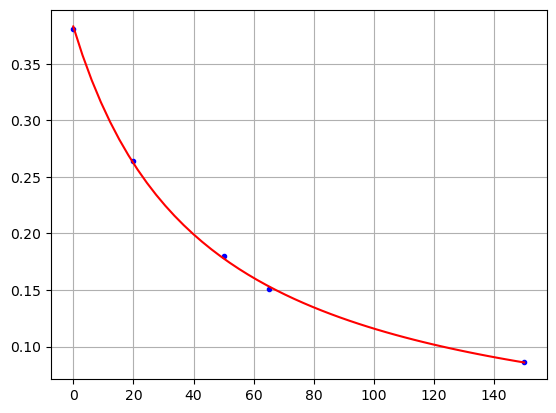

In [82]:
# ajuste hiperbólico, em que a1 = k, a2 = 1/c0
X = np.array([0, 20, 50, 65, 150]).astype(float)
Y = np.array([0.381, 0.264, 0.180, 0.151, 0.086]).astype(float)

Yl = np.power(Y, -1) 
# montando a matriz do sistema
# ajuste por a1*x + a2*1, ou seja, g1(x) = x, g2(x) = 1
g1 = lambda x: x
g2 = lambda x: np.ones(len(x))

V = np.array([g1(X), g2(X)]).T
A = np.dot(V.T,V)
B = np.dot(V.T,Yl)
a = np.linalg.solve(A,B)
print ("Parâmetros k=", a[0]," e 1/c0 =", a[1])

# lista de pontos para os plots
Xr = np.linspace(X[0], X[-1], 50)

# hipérbole
g = lambda X: np.power(a[0]*X+a[1], -1)
Yr = g(Xr)
print(f"A concentração em t=160min é {g(160)}mols/L")

# plotando
plt.plot(X, Y, "b.", Xr, g(Xr), "r-") 
plt.grid()
plt.show()

**4.** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/524)) O modelo a seguir é usado frequentemente em engenharia ambiental para parametrizar o efeito da temperatura $T$ ($°C$) nas taxas de reações químicas $k$ (por dia),

$$
k=k_{20} \theta^{T-20}
$$

em que $k_{20}$ e $\theta$ são parâmetros. Use uma transformação para linearizar essa equação. A seguir, use regressão linear para estimar $k_{20}$ e $\theta$ e para prever a taxa de reação em $T = 17 °C$.

$$
\begin{array}{l|ccccc}
T\left({ }^{\circ} \mathrm{C}\right) & 6 & 12 & 18 & 24 & 30 \\
\hline k \text { (por dia) } & 0,14 & 0,20 & 0,31 & 0,46 & 0,69
\end{array}
$$

Parâmetros theta= 1.0693490774707717  e k20 = 0.3517744783759333
A taxa de reação em T=20°C é 0.3517744783759333 / dia


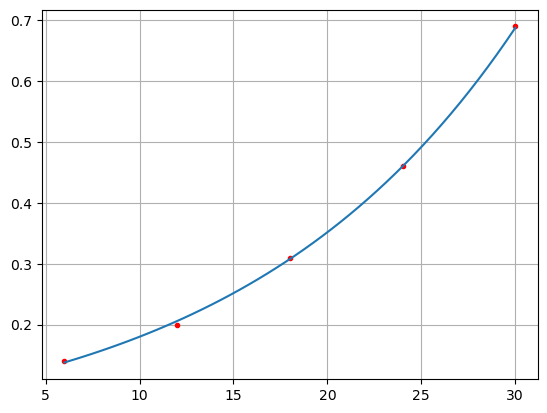

In [93]:
# ajuste exponencial, em que a2 = ln(k20), a1 = ln(theta)
X = np.array([6, 12, 18, 24, 30]).astype(float)
Y = np.array([0.14, 0.20, 0.31, 0.46, 0.69]).astype(float)

Yl = np.log(Y) 
# montando a matriz do sistema
# ajuste por a1*x + a2*1, ou seja, g1(x) = x, g2(x) = 1
g1 = lambda x: x - 20
g2 = lambda x: np.ones(len(x))

V = np.array([g1(X), g2(X)]).T
A = np.dot(V.T,V)
B = np.dot(V.T,Yl)
a = np.linalg.solve(A,B)
print ("Parâmetros theta=", np.exp(a[0])," e k20 =", np.exp(a[1]))

# lista de pontos para os plots
Xr = np.linspace(X[0], X[-1], 50)

# exponencial
k = math.exp(a[1])
b = math.exp(a[0])
g = lambda X: k*np.power(b,(X-20))

print(f"A taxa de reação em T=20°C é {g(20)} / dia")
Yr = g(Xr)
# plotando
plt.plot(X, Y, "r.", Xr, g(Xr), "-") 
plt.grid()
plt.show()

**5.** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/527)) A equação de Andrade foi proposta como um modelo para o efeito da temperatura sobre a viscosidade,

$$
\mu=D e^{B / T_a}
$$


onde $\mu$ é a viscosidade dinâmica da água ($10^{−3} N · s/m^2$), $T_a$ é a temperatura absoluta ($K$), e $D$ e $B$ são parâmetros. Ajuste esse modelo aos dados para a água

$$
\begin{array}{c|cccccc}
T & 0 & 5 & 10 & 20 & 30 & 40 \\
\hline \mu & 1,787 & 1,519 & 1,307 & 1,002 & 0,7975 & 0,6529
\end{array}
$$

Parâmetros a1= -0.025135942721814776  e a2 = 1.7210208324494014


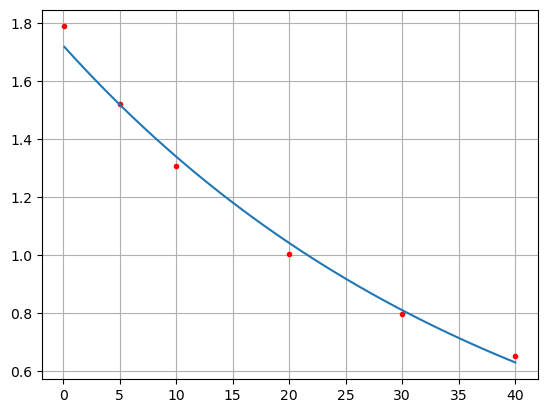

In [118]:
# ajuste exponencial, em que a2 = ln(D), a1 = B
X = np.array([0.1, 5, 10, 20, 30, 40]).astype(float)
Y = np.array([1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529]).astype(float)

Yl = np.log(Y)
Xl = 1 / X
# montando a matriz do sistema
# ajuste por a1*x + a2*1, ou seja, g1(x) = x, g2(x) = 1
g1 = lambda x: x
g2 = lambda x: np.ones(len(x))

V = np.array([g1(X), g2(X)]).T
A = np.dot(V.T,V)
B = np.dot(V.T,Yl)
a = np.linalg.solve(A,B)
print ("Parâmetros a1=", a[0]," e a2 =", np.exp(a[1]))

# lista de pontos para os plots
Xr = np.linspace(X[0], X[-1], 50)

# exponencial
D = np.exp(a[1])
B = a[0]
g = lambda X: D*np.exp(B*X)

Yr = g(Xr)
# plotando
plt.plot(X, Y, "r.", Xr, g(Xr), "-") 
plt.grid()
plt.show()